# Bayes Kuralı

Quiz2 de yaptığım gibi;
Train dataset olarak verdiğiniz kısmı modelimi eğitmek için kullandım.
Oluşturduğum bayes modelini verdiğiniz Test datasetinin üzerinde denedim.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Train Dataset
* Train datası import edildi
* Yanlış formattaki datalar temizlendi
* String degerler integer a dönüştürüldü
* normalization yapıldı
* data split edildi
* k-fold cross validation(k=10) ile data faklı kombinasyonlarla eğitildi, ortalama accuracy bulundu.
* bayes modeli fit edildi.
* train dataseti içinden oluşturulan test datasıyla prediction yapıldı, accuracy bulundu.

In [2]:
data_train = pd.read_excel("train_set.xlsx")
data_train

,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,"Shenzhen, Guangdong",male,66.0,1.0,0.0,0
1,Shanghai,female,56.0,0.0,1.0,0
2,Zhejiang,male,46.0,0.0,1.0,0
3,Tianjin,female,60.0,1.0,0.0,0
4,Tianjin,male,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3358,Basal-Stadt,female,NaN,0.0,0.0,0
3359,Basal-Stadt,male,23.0,0.0,0.0,0
3360,Basal-Stadt,NaN,NaN,NaN,NaN,NaN
3361,Basal-Stadt,23,NaN,NaN,NaN,NaN


In [3]:
data_train.gender.unique()

array(['male', 'female', nan, 20, 23], dtype=object)

In [4]:
data_train = data_train[data_train["gender"].isin(["male","female"])]
data_train.gender.unique()

array(['male', 'female'], dtype=object)

In [5]:
data_train.gender = [1 if each == "male" else 0 for each in data_train.gender]
data_train.gender.unique()

C:\Users\BESIME\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([1, 0], dtype=int64)

In [6]:
data_train.location.unique()

array(['Shenzhen, Guangdong', 'Shanghai', 'Zhejiang', 'Tianjin',
       'Chongqing', 'Sichuan', 'Beijing', 'Shandong', 'Yunnan', 'Jiangxi',
       'Macau', 'Liaoning', 'Fujian', 'Guizhou', 'Shanxi', 'Ningxia',
       'Guangxi', 'Henan', 'Hebei', 'Wuhan, Hubei', 'Hunan', 'Gansu',
       'Heilongjiang', 'Xinjiang', 'Hubei', 'Inner Mongolia', 'Shaanxi',
       'Hechi, Guangxi', 'Jilin', 'Bordeaux', 'Paris', 'Annecy', 'Amiens',
       'Strasbourg', 'Lile', 'Nantes', 'Montpellier', 'Brest', 'Dijon',
       'Lyon', 'Bois-Guillaume', 'Nice', 'Landes', 'Pays de la Loire',
       'Pays', 'Guadeloupe', 'Kanagawa', 'Tokyo', 'Aichi Prefecture',
       'Nara Prefecture', 'Hokkaido', 'Osaka Prefecture', 'Mie', 'Japan',
       'Kyoto', 'Haneda', 'Wakayama Prefecture', 'Chiba Prefecture',
       'Okinawa Prefecture', 'Sagamihara', 'Sapporo', 'Nagoya City',
       'Fukuoka Prefecture', 'Ishikawa', 'Kumamoto City',
       'Kumamoto Prefecture', 'Nagano Prefecture', 'Gifu Prefecture',
       'Sagamihara 

In [7]:
#data_train.location.unique().reshape(-1,1)
location1 = pd.DataFrame({'location': data_train.location.unique(),
                          'location_id': np.arange(data_train.location.nunique())})
location1

,location,location_id
0,"Shenzhen, Guangdong",0
1,Shanghai,1
2,Zhejiang,2
3,Tianjin,3
4,Chongqing,4
...,...,...
202,Aargau,202
203,Zurich,203
204,Vaud,204
205,Basal-Stadt,205


In [8]:
for index, row in location1.iterrows():
    data_train["location"] = np.where((data_train.location == location1.location[index]), location1.location_id[index], data_train.location)
        
data_train


C:\Users\BESIME\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,0,1,66.0,1.0,0.0,0
1,1,0,56.0,0.0,1.0,0
2,2,1,46.0,0.0,1.0,0
3,3,0,60.0,1.0,0.0,0
4,3,1,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3356,203,0,30.0,0.0,0.0,0
3357,204,1,49.0,0.0,0.0,0
3358,205,0,NaN,0.0,0.0,0
3359,205,1,23.0,0.0,0.0,0


In [9]:
data_train.death.unique()

array([0, 1, '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/23/2020', '2/24/2020', '2/22/2020', '2/25/2020',
       '2/29/2020', 43833, nan, 43893, 44077, 43985, 44046, 43924, 44107,
       44138, 44168, 43832], dtype=object)

In [10]:
data_train = data_train[data_train["death"].isin([0,1])]
data_train.death.unique()

array([0, 1], dtype=object)

In [11]:
data_train.visiting_Wuhan.unique()

array([1., 0.])

In [12]:
data_train.from_Wuhan.unique()

array([ 0.,  1., nan])

In [13]:
data_train = data_train[data_train["from_Wuhan"].isin([0,1])]
data_train.from_Wuhan.unique()

array([0., 1.])

In [14]:
# drop rows with missing values
data_train.dropna(inplace=True)
data_train

,location,gender,age,visiting_Wuhan,from_Wuhan,death
0,0,1,66.0,1.0,0.0,0
1,1,0,56.0,0.0,1.0,0
2,2,1,46.0,0.0,1.0,0
3,3,0,60.0,1.0,0.0,0
4,3,1,58.0,0.0,0.0,0
...,...,...,...,...,...,...
3351,201,1,28.0,0.0,0.0,0
3355,202,1,26.0,0.0,0.0,0
3356,203,0,30.0,0.0,0.0,0
3357,204,1,49.0,0.0,0.0,0


In [15]:
y = data_train.death.values
x_data = data_train.drop(["death"], axis=1)

In [16]:
#%% normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x

,location,gender,age,visiting_Wuhan,from_Wuhan
0,0,1.0,0.685864,1.0,0.0
1,0.00487805,0.0,0.581152,0.0,1.0
2,0.0097561,1.0,0.476440,0.0,1.0
3,0.0146341,0.0,0.623037,1.0,0.0
4,0.0146341,1.0,0.602094,0.0,0.0
...,...,...,...,...,...
3351,0.980488,1.0,0.287958,0.0,0.0
3355,0.985366,1.0,0.267016,0.0,0.0
3356,0.990244,0.0,0.308901,0.0,0.0
3357,0.995122,1.0,0.507853,0.0,0.0


In [17]:
#%% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42)#aynı randomlıkta böl demek random state
x_train = x_train.astype('double')
y_train = y_train.astype('double')
x_test = x_test.astype('double')
y_test = y_test.astype('double')

* GaussianNB sınıfını import ettim
* 3 tane farklı Naive Bayes Sınıfı vardır.
* GaussianNB : Tahmin edeceğiniz veri veya kolon sürekli (real,ondalıklı vs.) ise
* BernoulliNB : Tahmin edeceğiniz veri veya kolon ikili ise ( Evet/Hayır , Sigara içiyor/ İçmiyor vs.)
* MultinomialNB : Tahmin edeceğiniz veri veya kolon nominal ise ( Int sayılar )
* Duruma göre bu üç sınıftan birini seçebilirsiniz. Modelin başarı durumunu etkiler.

In [18]:
#%%bayes modeli
from sklearn.naive_bayes  import GaussianNB
nb = GaussianNB()
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
#%% k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nb, X = x_train, y = y_train, cv = 10)
print("average accuracy: ", np.mean(accuracies))
print("average std: ", np.std(accuracies))

average accuracy:  0.9095495495495495
average std:  0.1552965854804745


In [20]:
#%% test
nb.fit(x_train,y_train)
prediction = nb.predict(x_test)

print("Bayes score : {} ".format(nb.score(x_test,y_test)))
prediction

Bayes score : 0.9529780564263323 


array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0.

# Test Dataset
* Test datası import edildi
* Yanlış formattaki datalar temizlendi
* String degerler integer a dönüştürüldü
* Normalization yapıldı
* Yukarıda fit ettiğimiz bayes modeline göre prediction yapıldı.
* Predictionlarımıza göre confusion matrix çizildi.
* Modelimize göre ölüm olasılıkları gösterildi.

In [21]:
data_test = pd.read_excel("test_set.xlsx")
data_test

,location,gender,age,visiting_Wuhan,from_Wuhan,death_true
0,Beijing,female,33.0,0,1,0
1,Beijing,female,33.0,0,1,0
2,Jiangsu,male,37.0,1,0,0
3,Heilongjiang,male,69.0,1,0,0
4,Guangxi,male,63.0,0,1,0
5,Guangxi,female,62.0,0,1,0
6,Guangxi,male,49.0,0,1,0
7,Sichuan,male,50.0,1,0,0
8,Sichuan,male,48.0,1,0,0
9,Sichuan,male,36.0,1,0,0


In [22]:
# drop rows with missing values
data_test.dropna(inplace=True)

In [23]:
data_test.gender = [1 if each == "male" else 0 for each in data_test.gender]
data_test.gender.unique()

array([0, 1], dtype=int64)

In [24]:
# drop rows wrong format for death feature
data_test = data_test[data_test["death_true"].isin([0,1])]

In [25]:
for index, row in location1.iterrows():
    data_test["location"] = np.where((data_test.location == location1.location[index]), location1.location_id[index], data_test.location)
        
#data_test

In [26]:
y_data_test = data_test.death_true.values.reshape(-1,1)
#y_data_test

In [27]:
x_data_test = data_test.drop(["death_true"],axis = 1)
#x_data_test

In [28]:
#%% normalization
x_data_test = (x_data_test - np.min(x_data_test))/(np.max(x_data_test)-np.min(x_data_test))
x_data_test = x_data_test.astype('double')
x_data_test.head()

,location,gender,age,visiting_Wuhan,from_Wuhan
0,0.004975,0.0,0.12500,0.0,1.0
1,0.004975,0.0,0.12500,0.0,1.0
2,1.000000,1.0,0.18750,1.0,0.0
3,0.084577,1.0,0.68750,1.0,0.0
4,0.054726,1.0,0.59375,0.0,1.0


In [29]:
#%% 
prediction2 = nb.predict(x_data_test)
print("Bayes score : {} ".format(nb.score(x_data_test,y_data_test)))
prediction2

Bayes score : 0.9166666666666666 


array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [30]:
for index, row in location1.iterrows():
    data_test["location"] = np.where((data_test.location == location1.location_id[index]), location1.location[index], data_test.location)

In [31]:
data_test["death_estimation"] = prediction2.astype(int)
#data_test

# Confusion Matrix

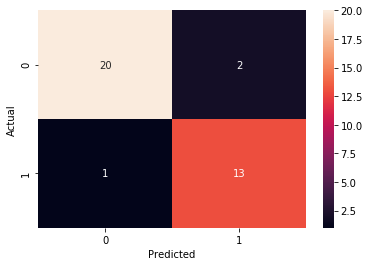

In [32]:
df = pd.DataFrame(data_test, columns=['death_true','death_estimation'])
confusion_matrix = pd.crosstab(df['death_true'], df['death_estimation'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [33]:
data_test["age"] = data_test["age"].astype(int)

In [34]:
probabilities = nb.predict_proba(x_data_test)
data_test["death_probability"]=(1-probabilities[:,0])*100

# Quiz3 Sonucu

In [35]:
data_test.style.format({"death_probability": "%{:20,.0f}"})

,location,gender,age,visiting_Wuhan,from_Wuhan,death_true,death_estimation,death_probability
0,Beijing,0,33,0,1,0,0,% 1
1,Beijing,0,33,0,1,0,0,% 1
2,Jiangsu,1,37,1,0,0,0,% 0
3,Heilongjiang,1,69,1,0,0,0,% 0
4,Guangxi,1,63,0,1,0,1,% 85
5,Guangxi,0,62,0,1,0,1,% 71
6,Guangxi,1,49,0,1,0,0,% 35
7,Sichuan,1,50,1,0,0,0,% 0
8,Sichuan,1,48,1,0,0,0,% 0
9,Sichuan,1,36,1,0,0,0,% 0
